In [17]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import requests
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [18]:
url1 = 'https://raw.githubusercontent.com/mandy941/Chinese-Product-in-US-Market/main/SNACK%20MARKET/Analysis%20Data/pastries/Yami%20Pastries.csv'
url2 = 'https://raw.githubusercontent.com/mandy941/Chinese-Product-in-US-Market/main/SNACK%20MARKET/Analysis%20Data/pastries/Pastries%20Data-weee%20ScrapeStorm.csv'
url3 = 'https://raw.githubusercontent.com/mandy941/Chinese-Product-in-US-Market/main/SNACK%20MARKET/Analysis%20Data/pastries/pastries-freshgogoData-ScrapeStorm.csv'
yami = pd.read_csv(url1, encoding='latin1')
yami.head()

,Product_Name,Brand,Price,Option,Rate,Origin,Reviews,Platform,Category,Sold_Weekly,Sold_Monthly,Weekly_Revenue
0,CHIO HEONG YUEN Abalone Pastries 180g,choi heong yuen bakery,6.29,5 Options,4.1,Macao,34,Yami,Pastries,200,800,1258.0
1,Sweet Scented Osmanthus Cake Pastries And Snac...,wufangzhai,6.49,No,0.0,Mainland China,0,Yami,Pastries,400,1600,2596.0
2,Pocky Almond Chocolate Biscuit Sticks 41g,glico,2.19,No,4.9,Japan,290,Yami,Pastries,1000,4000,2190.0
3,Koala Chocolate Cream Filling Biscuit 41g,lotte japan,1.19,2 Options,4.8,Japan,142,Yami,Pastries,900,3600,1071.0
4,Beijing Wheat Flour Cake 210g,dao xiang cun,5.99,No,4.7,Mainland China,182,Yami,Pastries,300,1200,1797.0


In [19]:
weee = pd.read_csv(url2, encoding='latin1')
weee.head()

,Product_Name,Price,Sold_Weekly,Origin,Brand,Option,Rate,Sold_Monthly,Weekly_Revenue,Platform,Category,Reviews
0,"All Purpose Puff Pastry Tart Shells, 16pc 320 g",6.49,1000,Mainland China,Unclear,Unclear,Unclear,4000,6490.0,Weee,Pastries,327
1,Chen Yun Pao Chuan Egg Yolk Pastry 3ct 1 each,8.49,400,Taiwan,Unclear,Unclear,Unclear,1600,3396.0,Weee,Pastries,473
2,"Puff Pastry Egg Tart Shells, Frozen 18pc 414 g",6.49,300,Mainland China,Unclear,Unclear,Unclear,1200,1947.0,Weee,Pastries,15
3,Chen Yun Pao Chuan Billionaire Taro Pastry 3pc...,8.99,300,Taiwan,Unclear,Unclear,Unclear,1200,2697.0,Weee,Pastries,200
4,Chen Yun Pao Chuan Mung Bean Pastries Box 3pc ...,8.99,300,Taiwan,Unclear,Unclear,Unclear,1200,2697.0,Weee,Pastries,80


In [20]:
freshgogo = pd.read_csv(url3)
freshgogo.head()

,Product_Name,Price,Origin,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue,Rate,Brand,Option,Platform,Category
0,MEI XIN Fine Goods Pastries Gift Box (jiu jiu ...,23.79,Mainland China,0,2961,740,17611,Unclear,Unclear,Unclear,Freshgogo,Pastries
1,KOI KEI BAKERY Almond Cookie (black sesame） (S...,14.49,Mainland China,0,0,0,0,Unclear,Unclear,Unclear,Freshgogo,Pastries
2,MEI XIN Fine Goods Pastries Gift Box (fat choy...,20.39,Mainland China,0,2972,743,15150,Unclear,Unclear,Unclear,Freshgogo,Pastries
3,QIAO JIA SHAN Osmanthus Sugar Rice Cake,6.99,Mainland China,0,2374,594,4149,Unclear,Unclear,Unclear,Freshgogo,Pastries
4,BESTORE Brown Sugar Mini Dough Twist,3.19,Mainland China,0,0,0,0,Unclear,Unclear,Unclear,Freshgogo,Pastries


# Combine three tables together

In [21]:
df = pd.concat([yami,weee,freshgogo])
df.head()

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Brand,Category,Option,Origin,Platform,Price,Product_Name,Rate,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue
0,choi heong yuen bakery,Pastries,5 Options,Macao,Yami,6.29,CHIO HEONG YUEN Abalone Pastries 180g,4.1,34,800,200,1258.0
1,wufangzhai,Pastries,No,Mainland China,Yami,6.49,Sweet Scented Osmanthus Cake Pastries And Snac...,0,0,1600,400,2596.0
2,glico,Pastries,No,Japan,Yami,2.19,Pocky Almond Chocolate Biscuit Sticks 41g,4.9,290,4000,1000,2190.0
3,lotte japan,Pastries,2 Options,Japan,Yami,1.19,Koala Chocolate Cream Filling Biscuit 41g,4.8,142,3600,900,1071.0
4,dao xiang cun,Pastries,No,Mainland China,Yami,5.99,Beijing Wheat Flour Cake 210g,4.7,182,1200,300,1797.0


In [22]:
print(df.shape)
print(list(df.columns))

(1585, 12)
['Brand', 'Category', 'Option', 'Origin', 'Platform', 'Price', 'Product_Name', 'Rate', 'Reviews', 'Sold_Monthly', 'Sold_Weekly', 'Weekly_Revenue']


# Analysis

In [23]:
df.describe()

,Price,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue
count,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000
mean,9.208215,21.781703,1281.223975,321.483281,2938.709148
std,21.734018,67.646075,1005.818273,250.050510,8804.267855
min,0.990000,0.000000,0.000000,0.000000,0.000000
25%,2.890000,1.000000,800.000000,200.000000,558.000000
50%,4.490000,4.000000,1600.000000,400.000000,1316.000000
75%,7.990000,16.000000,1600.000000,400.000000,2396.000000
max,518.000000,1196.000000,12412.000000,3103.000000,207200.000000


In [24]:
df.sum(axis = 0)

Brand             choi heong yuen bakerywufangzhaiglicolotte jap...
Category          PastriesPastriesPastriesPastriesPastriesPastri...
Option            5 OptionsNoNo2 OptionsNo10 OptionsNo5 Options2...
Origin            MacaoMainland ChinaJapanJapanMainland ChinaTai...
Platform          YamiYamiYamiYamiYamiYamiYamiYamiYamiYamiYamiYa...
Price                                                         14595
Product_Name      CHIO HEONG YUEN Abalone Pastries 180gSweet Sce...
Reviews                                                       34524
Sold_Monthly                                                2030740
Sold_Weekly                                                  509551
Weekly_Revenue                                          4.65785e+06
dtype: object

In [25]:
df['Origin'] = df['Origin'].replace('ROYAL FAMILY','Unclear')

# The Most Popular Origin (Highest Weekly Revenue /Num of Product)


In [26]:
origin = df.groupby(['Origin'])['Product_Name'].count()
origin

Origin
Canada              1
Denmark             6
England             1
France              5
Hong Kong          39
Indonesia          26
Italy               3
Itlay               6
Japan             529
Korea             111
Macao              20
Mainland China    420
Malaysia           14
Mexico              4
New Zealand         3
Philippines        14
Scotland            5
Singapore          19
South Korea         6
Taiwan            260
Thailand           20
Unclear            22
United States      45
Vietnam             6
Name: Product_Name, dtype: int64

In [27]:
pop_origin = df.groupby(['Origin'])['Weekly_Revenue'].sum()/df.groupby(['Origin'])['Product_Name'].count()
pop_origin

Origin
Canada             224.750000
Denmark           3118.541667
England           1396.000000
France            3525.450000
Hong Kong         2692.814103
Indonesia          890.115385
Italy                0.000000
Itlay             1829.333333
Japan             3983.558601
Korea             1404.400901
Macao             3519.562500
Mainland China    2306.105357
Malaysia          1246.428571
Mexico             110.750000
New Zealand        958.000000
Philippines        237.571429
Scotland          2716.000000
Singapore         1736.526316
South Korea        152.000000
Taiwan            3252.659615
Thailand           593.100000
Unclear           7201.750000
United States     1873.955556
Vietnam           1118.416667
dtype: float64

In [28]:
pop_origin.sort_values(ascending=False).head(15)

Origin
Unclear           7201.750000
Japan             3983.558601
France            3525.450000
Macao             3519.562500
Taiwan            3252.659615
Denmark           3118.541667
Scotland          2716.000000
Hong Kong         2692.814103
Mainland China    2306.105357
United States     1873.955556
Itlay             1829.333333
Singapore         1736.526316
Korea             1404.400901
England           1396.000000
Malaysia          1246.428571
dtype: float64

# The most popular brand by unit selling


In [29]:
pop_brand = df.groupby(['Brand'])['Weekly_Revenue'].sum()/df.groupby(['Brand'])['Product_Name'].count()
pop_brand

Brand
Unclear        2297.823420
agan           1797.000000
aji            1136.388889
ajichibean     1089.000000
akaibohshi     3978.864583
                  ...     
zess            796.000000
zhangyifan     2796.000000
zhenghongfu    3596.000000
zhiweiguan     2836.000000
zhongxiang     1841.000000
Length: 289, dtype: float64

In [30]:
pop_brand.sort_values(ascending=False).head(5)

Brand
pola            80930.333333
yami            27552.000000
jd gift         15996.000000
joyjoy          15596.000000
jenny bakery    15560.000000
dtype: float64

# The popular brand by revenue

In [31]:
pop_brand2 = df.groupby(['Brand'])['Weekly_Revenue'].sum()
pop_brand2

Brand
Unclear        618114.50
agan             1797.00
aji             10227.50
ajichibean       5445.00
akaibohshi      95492.75
                 ...    
zess             3184.00
zhangyifan      19572.00
zhenghongfu      3596.00
zhiweiguan      22688.00
zhongxiang      14728.00
Name: Weekly_Revenue, Length: 289, dtype: float64

In [32]:
pop_brand2.sort_values(ascending=False).head(5)

Brand
pola            971164.00
Unclear         618114.50
ishiya seika    140700.00
akaibohshi       95492.75
other brands     89968.00
Name: Weekly_Revenue, dtype: float64

# The Main Import Origin

In [33]:
main_origin = df.groupby(['Origin'])['Product_Name'].count()
main_origin

Origin
Canada              1
Denmark             6
England             1
France              5
Hong Kong          39
Indonesia          26
Italy               3
Itlay               6
Japan             529
Korea             111
Macao              20
Mainland China    420
Malaysia           14
Mexico              4
New Zealand         3
Philippines        14
Scotland            5
Singapore          19
South Korea         6
Taiwan            260
Thailand           20
Unclear            22
United States      45
Vietnam             6
Name: Product_Name, dtype: int64

In [34]:
main_origin.sort_values(ascending=False).head(5)

Origin
Japan             529
Mainland China    420
Taiwan            260
Korea             111
United States      45
Name: Product_Name, dtype: int64

# The most value import Origin

In [35]:
value_origin = df.groupby(['Origin'])['Weekly_Revenue'].sum()
value_origin

Origin
Canada                224.75
Denmark             18711.25
England              1396.00
France              17627.25
Hong Kong          105019.75
Indonesia           23143.00
Italy                   0.00
Itlay               10976.00
Japan             2107302.50
Korea              155888.50
Macao               70391.25
Mainland China     968564.25
Malaysia            17450.00
Mexico                443.00
New Zealand          2874.00
Philippines          3326.00
Scotland            13580.00
Singapore           32994.00
South Korea           912.00
Taiwan             845691.50
Thailand            11862.00
Unclear            158438.50
United States       84328.00
Vietnam              6710.50
Name: Weekly_Revenue, dtype: float64

In [36]:
value_origin.sort_values(ascending=False).head(5)

Origin
Japan             2107302.50
Mainland China     968564.25
Taiwan             845691.50
Unclear            158438.50
Korea              155888.50
Name: Weekly_Revenue, dtype: float64

# platform offers choice - most


In [37]:
choice = df.groupby(['Platform'])['Product_Name'].count()
choice

Platform
Freshgogo      27
Weee          234
Yami         1324
Name: Product_Name, dtype: int64

In [38]:
value_choice =  df.groupby(['Platform'])['Weekly_Revenue'].sum()/df.groupby(['Platform'])['Product_Name'].count()
value_choice

Platform
Freshgogo    12169.740741
Weee          1177.963675
Yami          3061.652190
dtype: float64

## The Number of profuct by origin

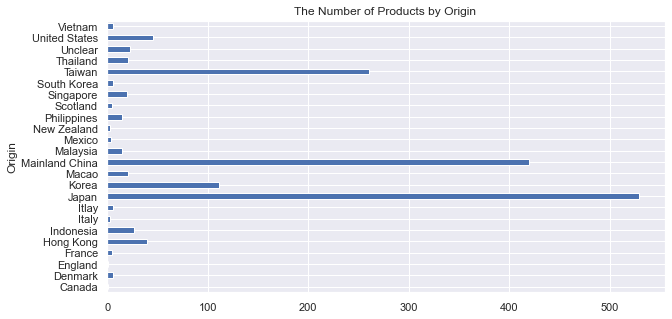

In [39]:
count_origin = df.groupby([df['Origin']])['Product_Name'].count()
count_origin.plot(kind='barh',figsize=(10,5),legend=None, title="The Number of Products by Origin ")

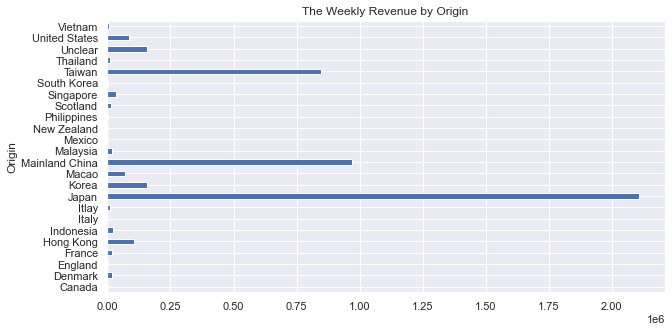

In [40]:
sum_revenue = df.groupby([df['Origin']])['Weekly_Revenue'].sum()
sum_revenue.plot(kind='barh',figsize=(10,5),legend=None, title="The Weekly Revenue by Origin ")

In [41]:
count_platform = df.groupby(['Platform'])['Product_Name'].count()
count_platform

Platform
Freshgogo      27
Weee          234
Yami         1324
Name: Product_Name, dtype: int64

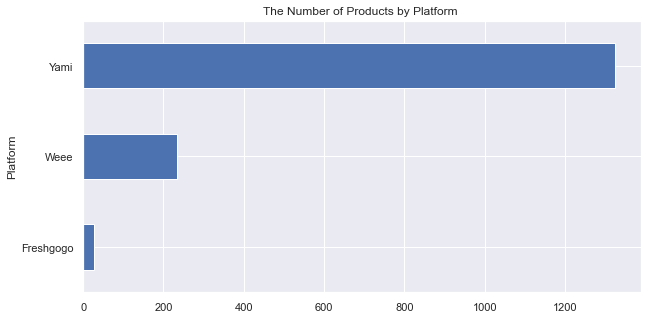

In [42]:
platform = df.groupby([df['Platform']])['Brand'].count()
platform.plot(kind='barh',figsize=(10,5),legend=None, title="The Number of Products by Platform ")

Text(0.5, 1.0, 'Figure 5: Correlations')

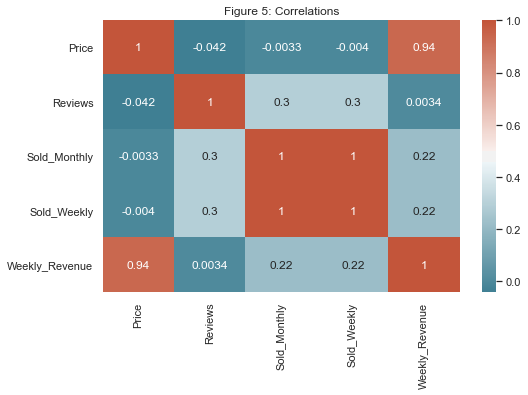

In [43]:
# Finding the correlation bewteen the Features.
plt.figure(figsize=(8,5))

corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure 5: Correlations')

## Origin vs Platform


Text(0.5, 1.0, 'Platform vs. Origin')

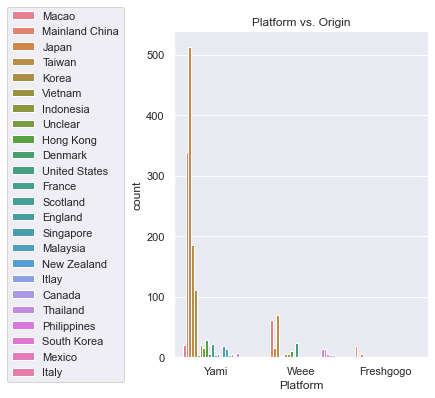

In [44]:
# Origin vs Platform

plt.rcParams['figure.figsize'] = (10, 6)

# compare the year with Origin with Platform
plt.subplot(121)
sns.countplot(x='Platform',hue= 'Origin', data=df, palette = 'husl')
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Platform vs. Origin')

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


Platform,Freshgogo,Weee,Yami
Origin,,,
Canada,0,0,1
Denmark,0,0,6
England,0,0,1
France,1,0,4
Hong Kong,0,10,29
Indonesia,0,5,21
Italy,0,3,0
Itlay,0,0,6
Japan,0,16,513


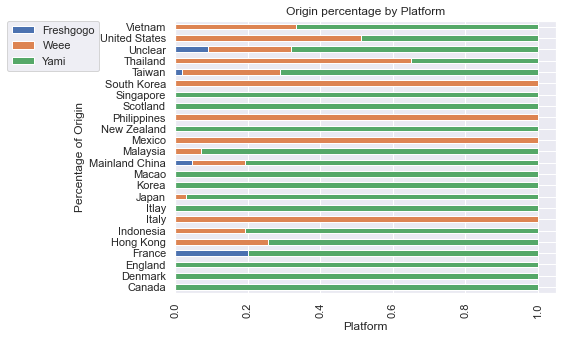

In [45]:
# check the Origin percentage of Platform
plt.rcParams['figure.figsize'] = (15, 5)
ax= plt.subplot(122)
c2_c = pd.crosstab(df.Origin, df.Platform)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, ax=ax)
plt.title('Origin percentage by Platform')
plt.legend(bbox_to_anchor=(-0.2, 1), loc='left', borderaxespad=0)
plt.xlabel('Platform')
plt.xticks(rotation=90)
plt.ylabel('Percentage of Origin')

c2_c

## Origin Vs Sold_Weekly_Group

In [46]:
df['Sold_Weekly_Group'] = pd.cut(x = df['Sold_Weekly'], 
                                   bins = [0,50,100,200,300,400,500,1000,2000,10000],
                                   labels = ['Less than 50','50+','100+','200+','300+','400+','500+','1000+','2000+'])
df.head()

,Brand,Category,Option,Origin,Platform,Price,Product_Name,Rate,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue,Sold_Weekly_Group
0,choi heong yuen bakery,Pastries,5 Options,Macao,Yami,6.29,CHIO HEONG YUEN Abalone Pastries 180g,4.1,34,800,200,1258.0,100+
1,wufangzhai,Pastries,No,Mainland China,Yami,6.49,Sweet Scented Osmanthus Cake Pastries And Snac...,0,0,1600,400,2596.0,300+
2,glico,Pastries,No,Japan,Yami,2.19,Pocky Almond Chocolate Biscuit Sticks 41g,4.9,290,4000,1000,2190.0,500+
3,lotte japan,Pastries,2 Options,Japan,Yami,1.19,Koala Chocolate Cream Filling Biscuit 41g,4.8,142,3600,900,1071.0,500+
4,dao xiang cun,Pastries,No,Mainland China,Yami,5.99,Beijing Wheat Flour Cake 210g,4.7,182,1200,300,1797.0,200+


Text(0.5, 1.0, 'Sold_Weekly_Group vs. Origin')

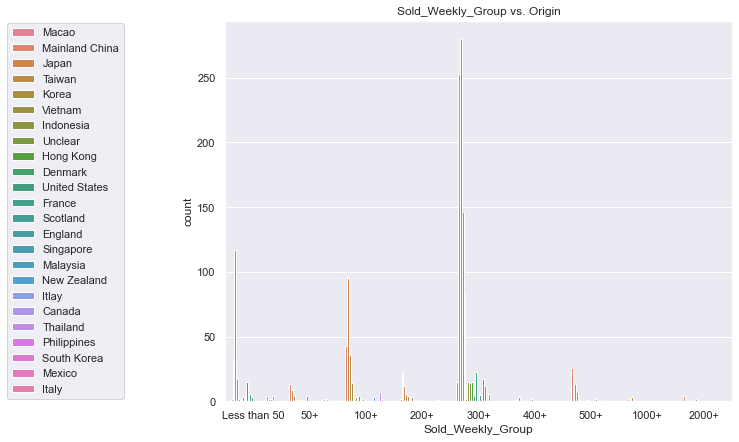

In [47]:
# origin vs sold weekly group

plt.rcParams['figure.figsize'] = (20, 7)

# compare the year with Origin with Platform
plt.subplot(121)
sns.countplot(x='Sold_Weekly_Group',hue= 'Origin', data=df, palette = 'husl')
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Sold_Weekly_Group vs. Origin')

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


Sold_Weekly_Group,Less than 50,50+,100+,200+,300+,400+,500+,1000+,2000+
Origin,,,,,,,,,
Canada,1,0,0,0,0,0,0,0,0
Denmark,1,0,0,0,4,0,1,0,0
England,0,0,0,0,1,0,0,0,0
France,3,0,1,1,0,0,0,0,0
Hong Kong,15,0,4,0,15,0,0,0,0
Indonesia,3,1,3,3,15,0,0,0,0
Itlay,0,0,0,0,6,0,0,0,0
Japan,117,9,95,12,280,1,11,0,0
Korea,2,0,14,4,84,0,7,0,0


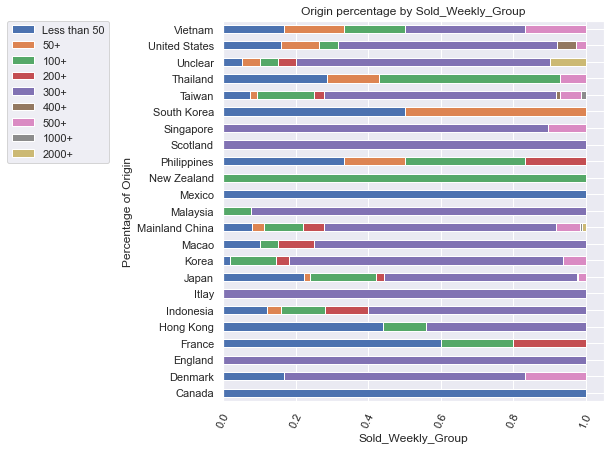

In [55]:
# origin vs sold weekly group

plt.rcParams['figure.figsize'] = (15, 7)
# check the Origin percentage of Platform
ax= plt.subplot(122)
c2_c = pd.crosstab(df.Origin,df.Sold_Weekly_Group)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, ax=ax)
plt.title('Origin percentage by Sold_Weekly_Group')
plt.legend(bbox_to_anchor=(-0.3, 1), loc='left', borderaxespad=0)
plt.xlabel('Sold_Weekly_Group')
plt.xticks(rotation=65)
plt.ylabel('Percentage of Origin')

c2_c

## Price_Group Vs Origin

In [49]:
df['Price_Group'] = pd.cut(x = df['Price'], 
                                   bins = [0,2,4,6,8,10,12,14,16,10000],
                                   labels = ['Less than 2','2+','4+','6+','8+','10+','12+','14+','16+'])
df.head()

,Brand,Category,Option,Origin,Platform,Price,Product_Name,Rate,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue,Sold_Weekly_Group,Price_Group
0,choi heong yuen bakery,Pastries,5 Options,Macao,Yami,6.29,CHIO HEONG YUEN Abalone Pastries 180g,4.1,34,800,200,1258.0,100+,6+
1,wufangzhai,Pastries,No,Mainland China,Yami,6.49,Sweet Scented Osmanthus Cake Pastries And Snac...,0,0,1600,400,2596.0,300+,6+
2,glico,Pastries,No,Japan,Yami,2.19,Pocky Almond Chocolate Biscuit Sticks 41g,4.9,290,4000,1000,2190.0,500+,2+
3,lotte japan,Pastries,2 Options,Japan,Yami,1.19,Koala Chocolate Cream Filling Biscuit 41g,4.8,142,3600,900,1071.0,500+,Less than 2
4,dao xiang cun,Pastries,No,Mainland China,Yami,5.99,Beijing Wheat Flour Cake 210g,4.7,182,1200,300,1797.0,200+,4+


Text(0.5, 1.0, 'Price_Group vs. Origin')

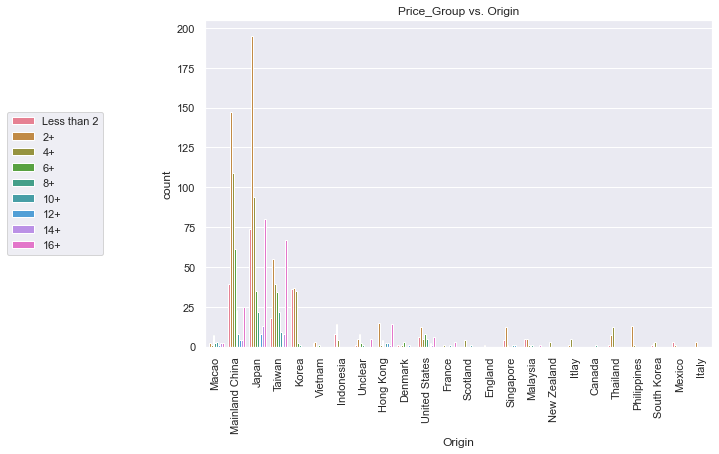

In [50]:
# origin vs Price group

plt.rcParams['figure.figsize'] = (20, 6)

# compare the year with Origin with price group
plt.subplot(121)
sns.countplot(x='Origin',hue= 'Price_Group', data=df, palette = 'husl')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Price_Group vs. Origin')

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


Origin,Canada,Denmark,England,France,Hong Kong,Indonesia,Italy,Itlay,Japan,Korea,...,New Zealand,Philippines,Scotland,Singapore,South Korea,Taiwan,Thailand,Unclear,United States,Vietnam
Price_Group,,,,,,,,,,,,,,,,,,,,,
Less than 2,0,1,0,0,0,8,0,0,74,36,...,0,0,0,4,1,18,1,1,6,2
2+,0,0,1,0,15,14,3,1,195,37,...,0,13,0,12,2,55,7,5,12,3
4+,0,1,0,1,1,4,0,5,94,35,...,3,1,4,1,3,39,12,8,5,0
6+,0,3,0,0,4,0,0,0,35,2,...,0,0,0,0,0,34,0,2,8,1
8+,1,0,0,0,0,0,0,0,22,1,...,0,0,0,0,0,22,0,1,5,0
10+,0,0,0,1,2,0,0,0,8,0,...,0,0,1,1,0,9,0,0,0,0
12+,0,1,0,0,2,0,0,0,8,0,...,0,0,0,1,0,8,0,0,2,0
14+,0,0,0,0,1,0,0,0,13,0,...,0,0,0,0,0,8,0,0,1,0
16+,0,0,0,3,14,0,0,0,80,0,...,0,0,0,0,0,67,0,5,6,0


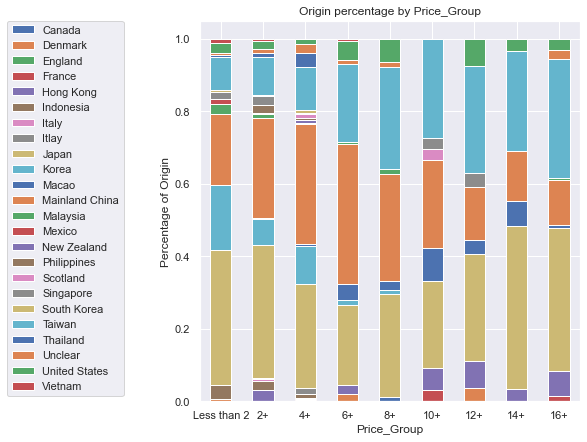

In [57]:
# origin vs sold weekly group

plt.rcParams['figure.figsize'] = (15, 7)

# check the Origin percentage of Platform
ax= plt.subplot(122)
c2_c = pd.crosstab(df.Price_Group, df.Origin)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Origin percentage by Price_Group')
plt.legend(bbox_to_anchor=(-0.2, 1), loc='left', borderaxespad=0)
plt.xlabel('Price_Group')
plt.xticks(rotation=0)
plt.ylabel('Percentage of Origin')

c2_c

## Price_Group Vs Sold_Weekly_Group


C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


Sold_Weekly_Group,Less than 50,50+,100+,200+,300+,400+,500+,1000+,2000+
Price_Group,,,,,,,,,
Less than 2,45,3,31,7,107,0,5,0,0
2+,58,9,77,16,325,2,23,0,1
4+,44,4,48,17,176,2,10,2,5
6+,18,4,24,5,88,1,14,1,0
8+,16,2,10,2,41,1,0,0,0
10+,4,0,5,1,19,0,2,0,0
12+,5,2,3,1,13,0,1,0,0
14+,1,1,1,0,17,0,3,0,0
16+,21,13,15,4,106,1,5,2,0


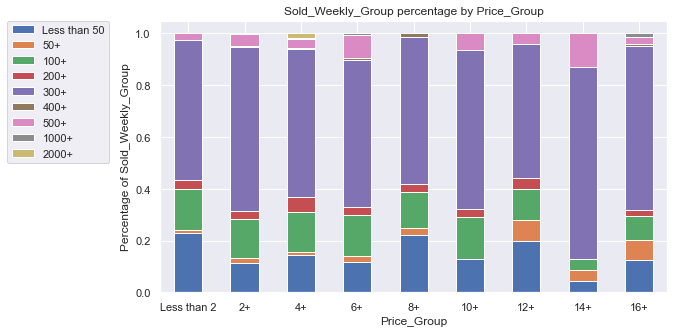

In [52]:
plt.rcParams['figure.figsize'] = (20, 5)

# check the Price_Group percentage of Sold_Weekly_Group
ax= plt.subplot(122)
c2_c = pd.crosstab(df.Price_Group, df.Sold_Weekly_Group)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Sold_Weekly_Group percentage by Price_Group')
plt.legend(bbox_to_anchor=(-0.1, 1), loc='left', borderaxespad=0)
plt.xlabel('Price_Group')
plt.xticks(rotation=0)
plt.ylabel('Percentage of Sold_Weekly_Group')

c2_c

Text(0.5, 1.0, 'Price_Group vs. Sold_Weekly_Group')

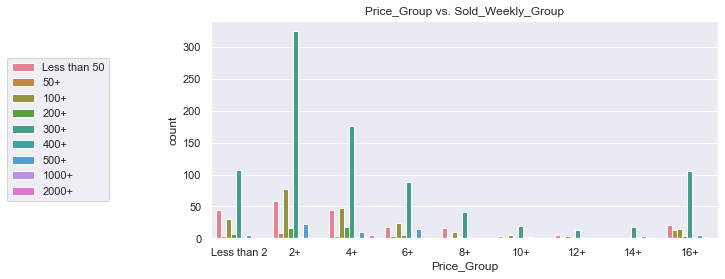

In [53]:
# price group vs sold weekly group

plt.rcParams['figure.figsize'] = (20, 4)

# compare the year with price group with sold weekly group
plt.subplot(121)
sns.countplot(x='Price_Group',hue= 'Sold_Weekly_Group', data=df, palette = 'husl')
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Price_Group vs. Sold_Weekly_Group')

In [54]:
df.to_csv(r'C:\Users\13750\Desktop\Empire Bazaar Group Corp\US chinese product market\SNACK MARKET\Analysis Data\pastries\pastry.csv', index = False)